In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank=pd.read_csv("bankruptcy_prevention.csv",sep=';')

In [3]:
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [61]:
bank.shape

(250, 7)

In [62]:
bank.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

There are no missing values

In [63]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [4]:
column_names = bank.columns

print(column_names)

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')


In [5]:
column_names = [name.replace(' ', '') for name in column_names]

# Now, column_names list contains strings without spaces
print(column_names)

['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']


In [6]:
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [7]:
bank.columns = [name.replace(' ', '') for name in bank.columns]

In [8]:
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [9]:
column_names = bank.columns

print(column_names)

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')


In [70]:
bank['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [71]:
# converting class field to numeric if bankruptcy, 0 else 1 

In [27]:
bank['class']= bank['class'].map( lambda x: 0 if x =='bankruptcy'  else 1)

In [28]:
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,operating_risk,class
0,0.5,1.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,1.0,0
4,1.0,1.0,0.0,0.0,1.0,0


In [74]:
bank['class'].value_counts()

1    143
0    107
Name: class, dtype: int64

<Axes: >

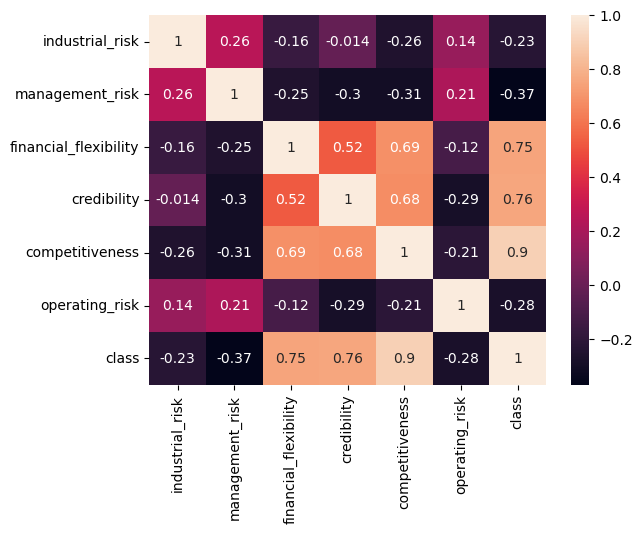

In [75]:
sns.heatmap(bank.corr(),annot=True)

Since competitiveness has a high corelation with financial flexibility and credibility we can safely remove compettiveness

In [29]:
bank = bank.drop('competitiveness', axis=1)

KeyError: "['competitiveness'] not found in axis"

In [30]:
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,operating_risk,class
0,0.5,1.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,1.0,0
4,1.0,1.0,0.0,0.0,1.0,0


<Axes: >

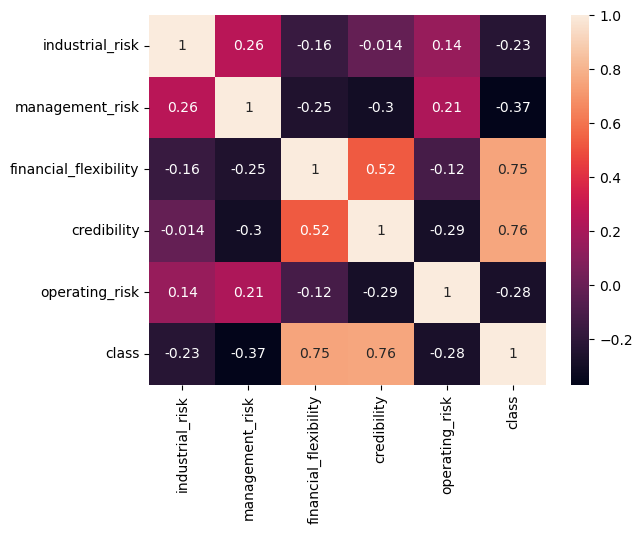

In [31]:
sns.heatmap(bank.corr(),annot=True)

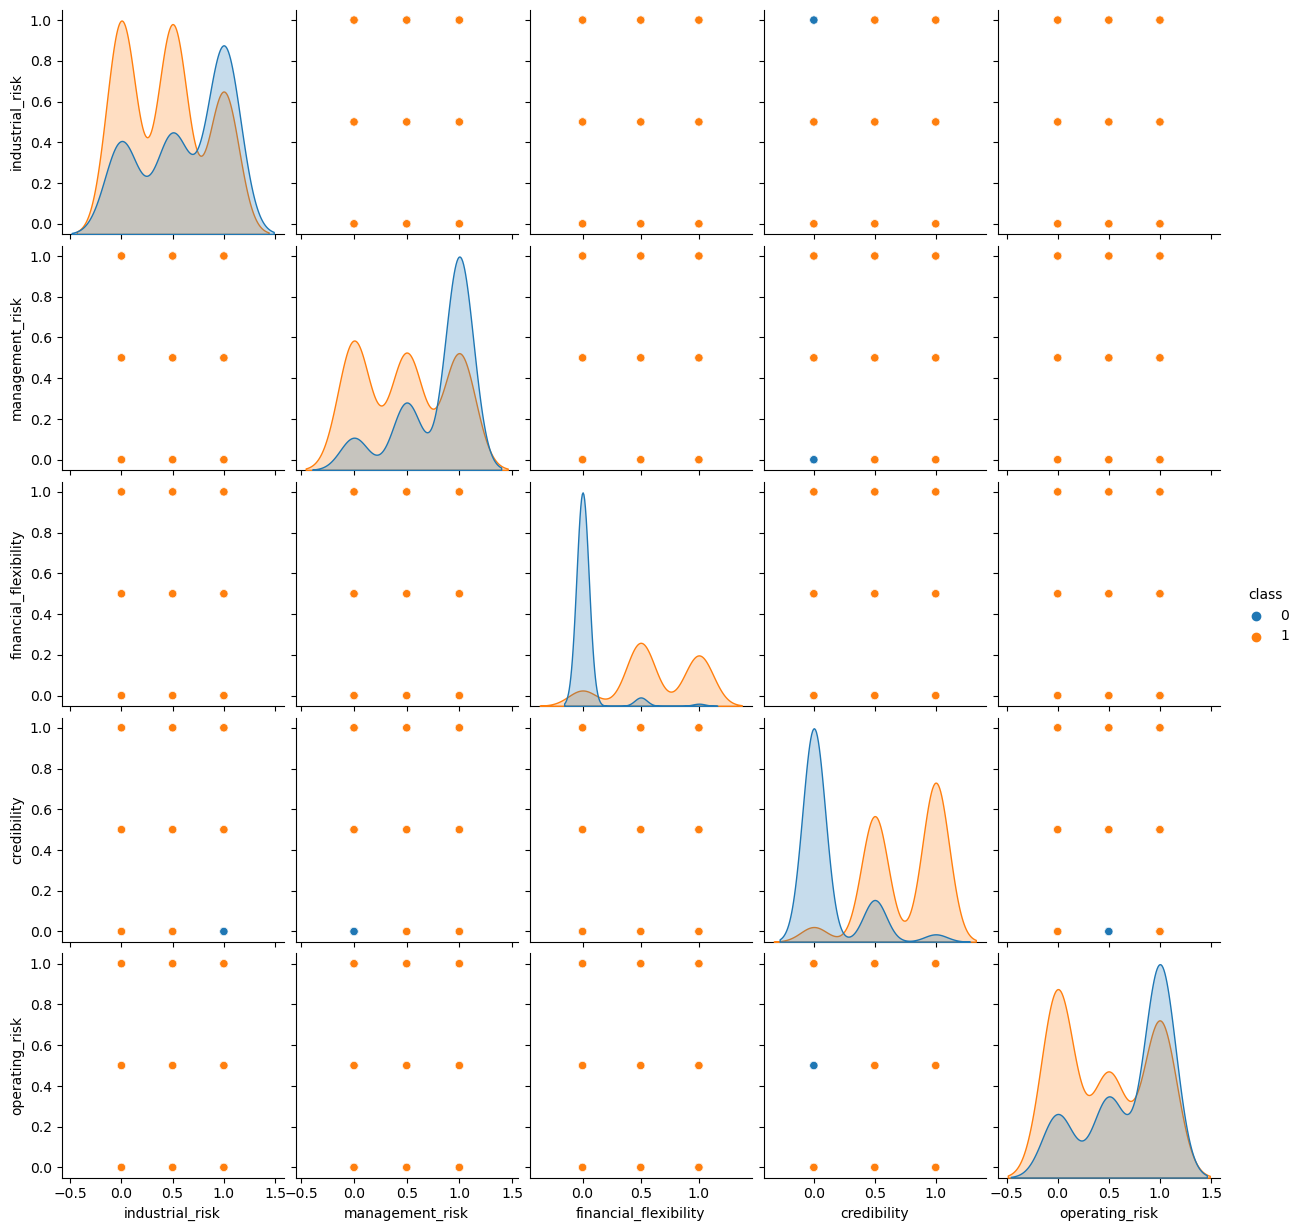

In [79]:
sns.pairplot(bank,hue='class')

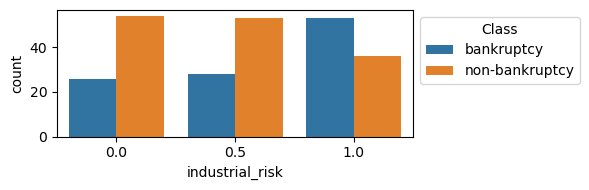

In [32]:
plt.figure(figsize=(6,2))
sns.countplot(x=bank['industrial_risk'],hue=bank['class'])
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

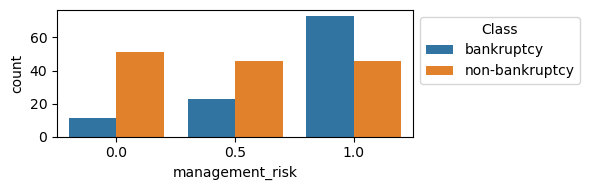

In [33]:
plt.figure(figsize=(6,2))
sns.countplot(x=bank['management_risk'],hue=bank['class'])
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

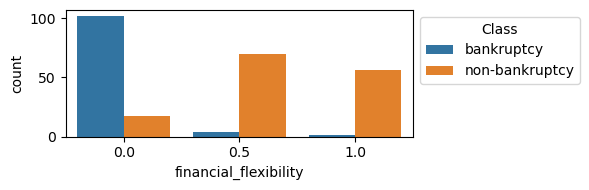

In [34]:
plt.figure(figsize=(6,2))
sns.countplot(x=bank['financial_flexibility'],hue=bank['class'])
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

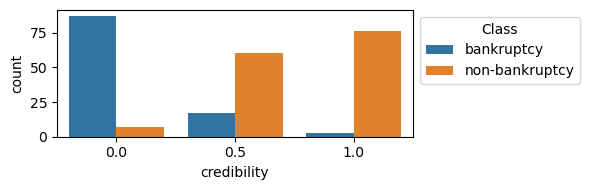

In [35]:
plt.figure(figsize=(6,2))
sns.countplot(x=bank['credibility'],hue=bank['class'])
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

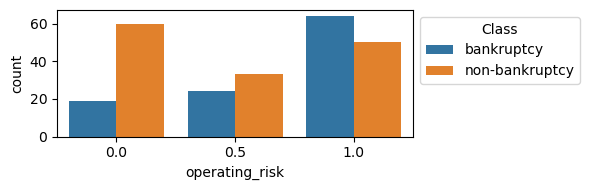

In [36]:
plt.figure(figsize=(6,2))
sns.countplot(x=bank['operating_risk'],hue=bank['class'])
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Split the data into feature and target variables

In [32]:
y=bank.iloc[:,-1]
X=bank.iloc[:,:5]

In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [34]:
y.tail()

245    1
246    1
247    1
248    1
249    1
Name: class, dtype: int64

In [35]:
X.head()

,industrial_risk,management_risk,financial_flexibility,credibility,operating_risk
0,0.5,1.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,1.0
4,1.0,1.0,0.0,0.0,1.0


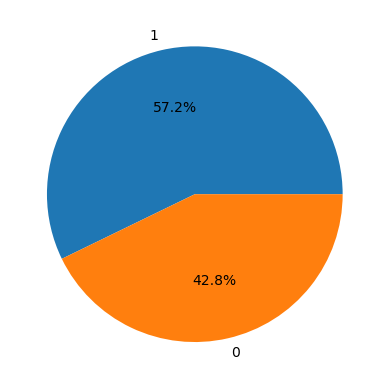

In [36]:
value_counts=y.value_counts()
labels = value_counts.index
values = value_counts.values

# piechart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

### We can try logistic regression since our outcome is binary

### Train test split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=200)


In [38]:
X_train.head()

,industrial_risk,management_risk,financial_flexibility,credibility,operating_risk
36,1.0,1.0,0.0,1.0,0.0
73,0.0,1.0,0.0,0.0,1.0
78,0.5,1.0,0.0,0.0,1.0
172,0.5,0.5,0.0,1.0,0.0
104,0.5,1.0,0.0,0.0,1.0


In [39]:
X_test.head()

,industrial_risk,management_risk,financial_flexibility,credibility,operating_risk
145,0.5,0.0,1.0,0.5,0.5
200,0.5,0.5,0.0,1.0,0.0
22,0.0,1.0,0.0,0.0,1.0
192,0.5,1.0,0.0,0.0,0.0
204,0.0,0.5,0.5,1.0,1.0


### Train the model

In [40]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

### Predictions

In [41]:
y_pred = logmodel.predict(X_test)

In [42]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1],
      dtype=int64)

In [43]:
np.array(y_test)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1],
      dtype=int64)

## Model Evaluation

### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[24  1]
 [ 2 36]]


In [45]:
Accuracy = (24+36)/(24+36+1+2)
Accuracy

0.9523809523809523

### Classification report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.97      0.95      0.96        38

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



### Area under curve

Text(0, 0.5, 'True Positive Rate')

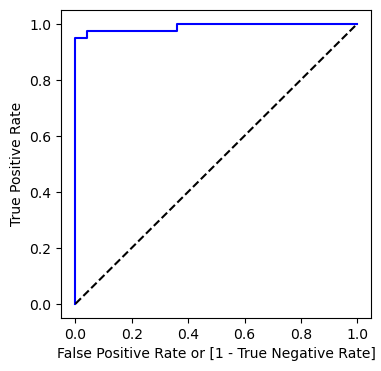

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.subplots(figsize=(4,4))
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [48]:
auc

0.9536842105263157

Lets check for overfitting

### K fold Cross validation using K=5

In [55]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear')

In [56]:
k=5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [57]:
accuracy_scores = cross_val_score(logistic_model, X, y, cv=kf, scoring='accuracy')

In [58]:
print("Cross-Validation Results:")
print("Accuracy scores for each fold:", accuracy_scores)
print("Mean accuracy:", accuracy_scores.mean())
print("Standard deviation of accuracy:", accuracy_scores.std())

Cross-Validation Results:
Accuracy scores for each fold: [1.   1.   0.94 0.98 0.98]
Mean accuracy: 0.9800000000000001
Standard deviation of accuracy: 0.021908902300206666


#### For the 5 folds, we have the following accuracy scores: [1.00, 1.00, 0.94, 0.98, 0.98].
#### Scores of 1.00 indicate perfect accuracy on those folds, which means the model made no errors in those subsets.

The Mean accuracy is the average of the accuracy scores across all folds.
The mean accuracy is approximately 0.980, or 98.0%.
This indicates the overall accuracy of the model across the different subsets of the data.

The standard deviation is approximately 0.0219.
A lower standard deviation suggests that the model's performance is consistent across different subsets of the data, while a higher standard deviation might indicate more variability in performance.

### So, we can conclude that there is no overfitting. And the model is impressive with 95% accuracy

In [59]:
from sklearn.model_selection import learning_curve

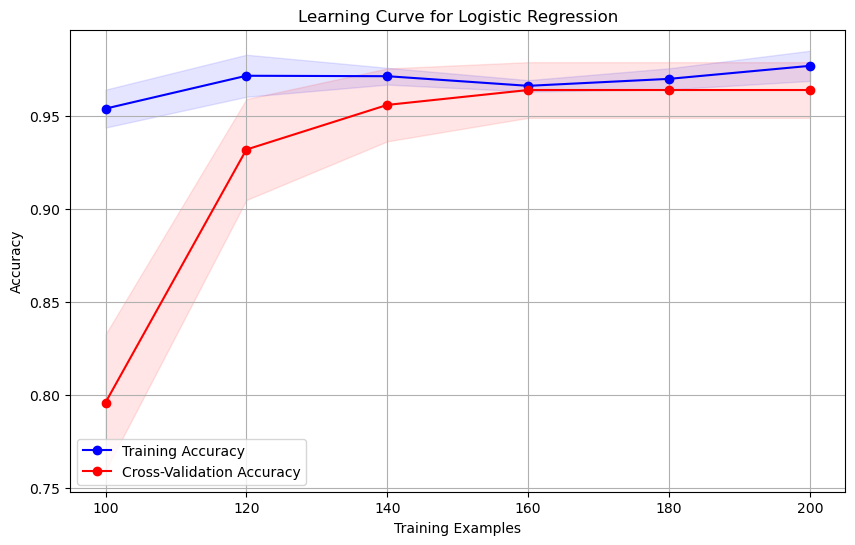

In [60]:
# Define the sizes of the training data subsets to use for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    logistic_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot the mean training and test scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-Validation Accuracy")

# Add a legend
plt.legend(loc="best")

# Show the learning curve plot
plt.show()

The learning curve above also shows that it is a good model

## Saving the model using pickle

In [61]:
import pickle

In [62]:


# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(logmodel, file)

In [63]:
# Load the saved model from a file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [71]:
# New data for prediction (X_new should have the same feature structure as the data used to train the model)
X_new = [[0.5,1,0,0,0.5]] # Replace with your new data

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_new)

# The 'predictions' variable now contains the model's predictions
print(predictions)

[0]


C:\Users\Noufal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
!pip install streamlit

     ---------------------------------------- 7.6/7.6 MB 154.2 kB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 141.2 kB/s eta 0:00:00
     -------------------------------------- 24.3/24.3 MB 264.2 kB/s eta 0:00:00
     ------------------------------------ 190.6/190.6 kB 500.9 kB/s eta 0:00:00
     ------------------------------------ 516.2/516.2 kB 347.9 kB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 3.5 MB/s eta 0:00:00
     ------------------------------------ 341.8/341.8 kB 530.6 kB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
      Successfully uninstalled tenacity-8.0.1


In [72]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import pickle

# Load the saved model from a file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
st.title("Bankruptcy prediction")

Industrial_risk = ["High","Intermediate","Low"]
Management_risk =["High","Intermediate","Low"]
Financial_flexibility =["High","Intermediate","Low"]
Credibility=["High","Intermediate","Low"]
Operating_risk=["High","Intermediate","Low"]


input1 = st.selectbox("Industrial Risk:", Industrial_risk)
input2 = st.selectbox("Management Risk:", Management_risk)
input3 = st.selectbox("Financial Flexibility:", Financial_flexibility)
input4 = st.selectbox("Credibility:", Credibility)
input5 = st.selectbox("Operating Risk:", Operating_risk)


value1 = lambda x: 1 if len(x) == 4 else (0 if len(x) == 3 else 0.5)
V1 = list(map(value1, [input1]))

value2 = lambda x: 1 if len(x) == 4 else (0 if len(x) == 3 else 0.5)
V2 = list(map(value2, [input2]))

value3 = lambda x: 1 if len(x) == 4 else (0 if len(x) == 3 else 0.5)
V3 = list(map(value3, [input3]))

value4 = lambda x: 1 if len(x) == 4 else (0 if len(x) == 3 else 0.5)
V4 = list(map(value4, [input4]))

value5 = lambda x: 1 if len(x) == 4 else (0 if len(x) == 3 else 0.5)
V5 = list(map(value5, [input5]))

to_predict=list[V1[0],V2[0],V3[0],V4[0],V5[0]]

#predictions = loaded_model.predict([to_predict])

if st.button("Predict"):
    predictions = loaded_model.predict([to_predict])
    if predictions==1:
        st.write("No chance of getting Bankrupted")
    else:
        st.write("Chance of getting Bankrupted")
    
